<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.795682  40.507578  66.124573  0.000162  143.427995   
      1.0    32.602690  97.980255  39.166040 -0.001209  179.747776   
      2.0    97.674448  74.937194  73.411121  0.001057  256.023820   
      3.0    91.815340  77.431276  91.376147 -0.001894  270.620869   
      4.0    27.539363  60.141611  81.441273 -0.001433  179.120813   
...                ...        ...        ...       ...         ...   
999.0 25.0   44.285612  77.970388  32.698064  0.000665  164.954728   
      26.0   47.074481  95.300003  43.752572  0.000691  196.127746   
      27.0   29.463118  47.309018  93.619850 -0.001995  180.389992   
      28.0   84.820200  79.064936  97.886339 -0.000525  271.770950   
      29.0   40.798840  71.943140  71.766502 -0.001069  194.507412   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    143.427210  0.000785  
      1.0    179.749139 -0.001363  
      2.0    256.021262  0.002558  
      3.0    270.620503  0.000366  
      4.0    179.120841 -0.000027  
...                 ...       ...  
999.0 25.0   164.954748 -0.000020  
      26.0   196.128523 -0.000777  
      27.0   180.390135 -0.000143  
      28.0   271.770738  0.000211  
      29.0   194.508249 -0.000836  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.795682  40.507578  66.124573  0.000162  143.427995   
      1.0    32.602690  97.980255  39.166040 -0.001209  179.747776   
      2.0    97.674448  74.937194  73.411121  0.001057  256.023820   
      3.0    91.815340  77.431276  91.376147 -0.001894  270.620869   
      4.0    27.539363  60.141611  81.441273 -0.001433  179.120813   
...                ...        ...        ...       ...         ...   
999.0 25.0   44.285612  77.970388  32.698064  0.000665  164.954728   
      26.0   47.074481  95.300003  43.752572  0.000691  196.127746   
      27.0   29.463118  47.309018  93.619850 -0.001995  180.389992   
      28.0   84.820200  79.064936  97.886339 -0.000525  271.770950   
      29.0   40.798840  71.943140  71.766502 -0.001069  194.507412   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    143.427210  0.000785  
      1.0    179.749139 -0.001363  
      2.0    256.021262  0.002558  
      3.0    270.620503  0.000366  
      4.0    179.120841 -0.000027  
...                 ...       ...  
999.0 25.0   164.954748 -0.000020  
      26.0   196.128523 -0.000777  
      27.0   180.390135 -0.000143  
      28.0   271.770738  0.000211  
      29.0   194.508249 -0.000836  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.795682,40.507578,66.124573,0.000162,143.427995,143.427210,0.000785
1,0.0,1.0,32.602690,97.980255,39.166040,-0.001209,179.747776,179.749139,-0.001363
2,0.0,2.0,97.674448,74.937194,73.411121,0.001057,256.023820,256.021262,0.002558
3,0.0,3.0,91.815340,77.431276,91.376147,-0.001894,270.620869,270.620503,0.000366
4,0.0,4.0,27.539363,60.141611,81.441273,-0.001433,179.120813,179.120841,-0.000027
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,44.285612,77.970388,32.698064,0.000665,164.954728,164.954748,-0.000020
29996,999.0,26.0,47.074481,95.300003,43.752572,0.000691,196.127746,196.128523,-0.000777
29997,999.0,27.0,29.463118,47.309018,93.619850,-0.001995,180.389992,180.390135,-0.000143
29998,999.0,28.0,84.820200,79.064936,97.886339,-0.000525,271.770950,271.770738,0.000211


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    26.795682  40.507578  66.124573  0.000162  143.427995   
      1.0    32.602690  97.980255  39.166040 -0.001209  179.747776   
      2.0    97.674448  74.937194  73.411121  0.001057  256.023820   
      3.0    91.815340  77.431276  91.376147 -0.001894  270.620869   
      4.0    27.539363  60.141611  81.441273 -0.001433  179.120813   
...                ...        ...        ...       ...         ...   
999.0 25.0   44.285612  77.970388  32.698064  0.000665  164.954728   
      26.0   47.074481  95.300003  43.752572  0.000691  196.127746   
      27.0   29.463118  47.309018  93.619850 -0.001995  180.389992   
      28.0   84.820200  79.064936  97.886339 -0.000525  271.770950   
      29.0   40.798840  71.943140  71.766502 -0.001069  194.507412   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    143.427210  0.000785  
      1.0    179.749139 -0.001363  
      2.0    256.021262  0.002558  
      3.0    270.620503  0.000366  
      4.0    179.120841 -0.000027  
...                 ...       ...  
999.0 25.0   164.954748 -0.000020  
      26.0   196.128523 -0.000777  
      27.0   180.390135 -0.000143  
      28.0   271.770738  0.000211  
      29.0   194.508249 -0.000836  

[30000 rows x 7 columns]

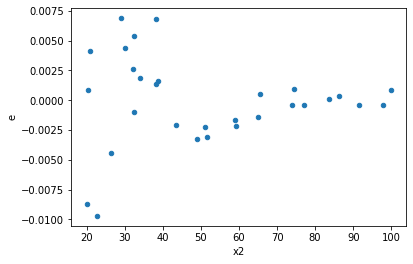

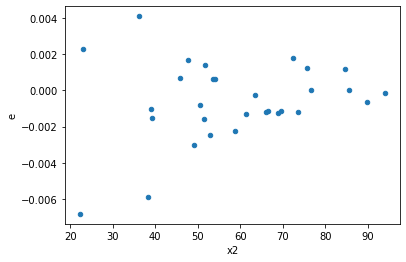

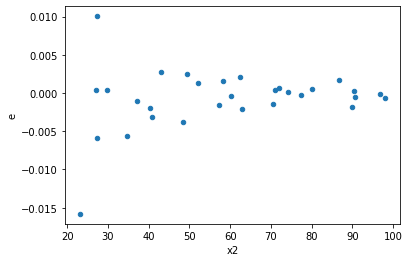

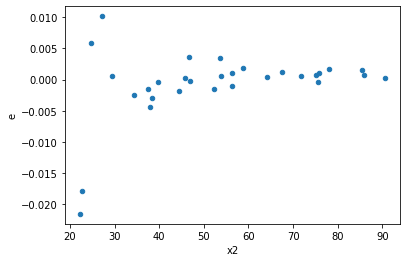

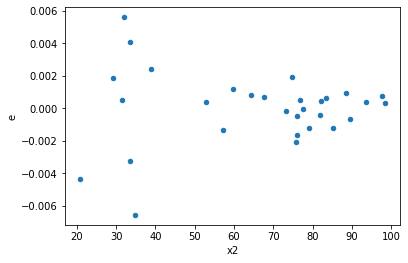

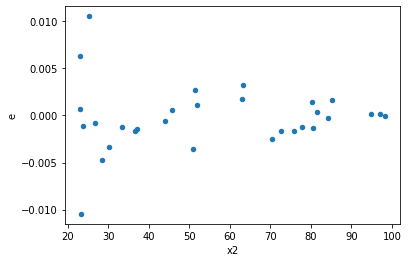

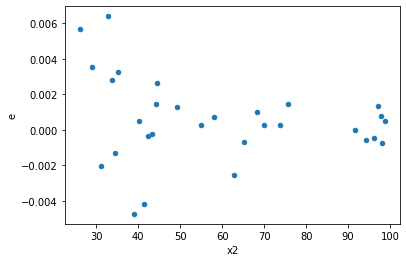

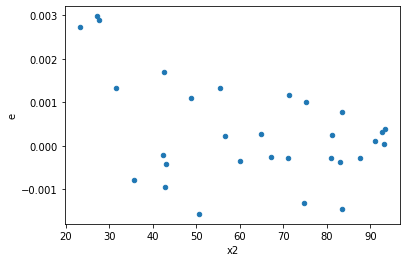

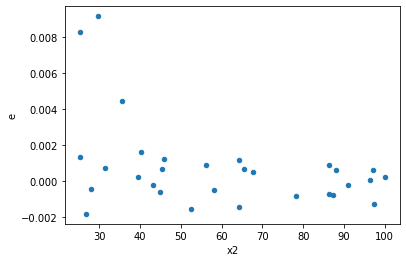

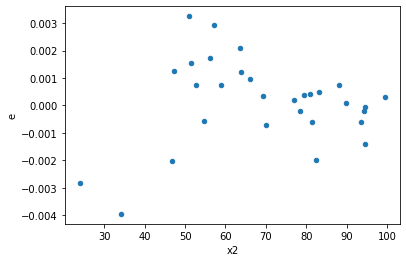

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
18.0,9.0,9.0,3.3221263555429e-05,4.025061192306673e-05,3.6912515061587778e-06,4.472290213674081e-06,1.2115918425531709,0.7796133669330718,0.6101933165334641,0.3898066834665359,Reject005=1 : Homoscedasticity
22.0,9.0,9.0,1.752814572636595e-05,4.179615751006725e-05,1.9475717473739946e-06,4.6440175011185835e-06,2.384516774481011,0.21156612525782892,0.8942169373710855,0.10578306262891446,Reject005=1 : Homoscedasticity
30.0,9.0,9.0,4.638752235014914e-05,8.087997189334045e-05,5.154169150016571e-06,8.986663543704495e-06,1.7435717148855314,0.42017374995611667,0.7899131250219417,0.21008687497805834,Reject005=1 : Homoscedasticity
46.0,9.0,9.0,2.4462138061073008e-05,2.9163115086102396e-05,2.718015340119223e-06,3.240346120678044e-06,1.1921735955088133,0.7977203987560249,0.6011398006219876,0.3988601993780124,Reject005=1 : Homoscedasticity
51.0,9.0,9.0,5.2237858982773625e-05,7.517405995468082e-05,5.804206553641514e-06,8.35267332829787e-06,1.4390723781284915,0.5963494647479992,0.7018252676260004,0.2981747323739996,Reject005=1 : Homoscedasticity
71.0,9.0,9.0,0.00011186600567921834,0.0002009775286490805,1.2429556186579817e-05,2.23308365165645e-05,1.7965916225291367,0.39588923229021034,0.8020553838548948,0.19794461614510517,Reject005=1 : Homoscedasticity
105.0,9.0,9.0,1.7319162249329038e-05,0.0001484384156728645,1.92435136103656e-06,1.6493157296984943e-05,8.570761884202287,0.0037370295050505042,0.9981314852474747,0.0018685147525252521,Reject005=0 : Heteroscedasticity
113.0,9.0,9.0,4.255226589283999e-05,5.013896264826486e-05,4.728029543648888e-06,5.5709958498072065e-06,1.1782912518579047,0.8109200068443714,0.5945399965778143,0.4054600034221857,Reject005=1 : Homoscedasticity
115.0,9.0,9.0,2.85771230790591e-05,3.380874474942897e-05,3.1752358976732334e-06,3.7565271943809964e-06,1.1830702711359886,0.8063519029409605,0.5968240485295198,0.40317595147048024,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,8.760563795202785e-05,2.721251045343171e-05,9.733959772447539e-06,3.0236122726035235e-06,0.31062510461179527,0.0965238077473936,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,9.780515323510156e-05,4.693402064881017e-06,1.0867239248344617e-05,5.21489118320113e-07,0.047987267640173685,0.00010903653185109388,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,0.00014085741986961231,7.909670534360175e-05,1.5650824429956924e-05,8.78852281595575e-06,0.5615373717395882,0.4029403561803396,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,2.9591476398266876e-05,1.3235086683734366e-05,3.2879418220296527e-06,1.4705651870815964e-06,0.44726009968564884,0.24642088257682698,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,6.808263977913293e-05,3.715347431652046e-05,7.564737753236992e-06,4.128163812946718e-06,0.5457114241905153,0.3803596704394553,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.00013895886342207402,4.8562068357508385e-06,1.543987371356378e-05,5.395785373056487e-07,0.03494708229586322,2.8690216749666604e-05,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,0.0001598049725325571,7.61525694205452e-06,1.7756108059173013e-05,8.4613966022828e-07,0.04765344170065209,0.00010591152669511425,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,8.020769700910146e-05,4.282188682196798e-05,8.911966334344606e-06,4.757987424663109e-06,0.5338874998132515,0.36362412008839906,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.00022504737761111648,8.323606078997555e-05,2.5005264179012943e-05,9.248451198886172e-06,0.36986016755017725,0.1545549503963392,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    636
Reject005=1 : Homoscedasticity      364
Name: Result_test, dtype: int64